# Using scipy curve fitting to find optimal coefitients

In [8]:
from numpy import arange
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import requests
%matplotlib inline

In [11]:
plt.style.use(['ggplot'])
url= 'https://github.com/samuel2pb/PT-Refrigerant-Fluid-Model/blob/master/R22%20PT%20Chart.xlsx'
myfile = requests.get(url)

In [12]:
df = pd.read_excel (myfile.content)
print (df)

XLRDError: Unsupported format, or corrupt file: Expected BOF record; found b'\n\n\n\n\n\n<!'

In [33]:
P = df['bar (g)'].values

In [34]:
t = df['T(ºC)'].values

Text(0, 0.5, '$T$')

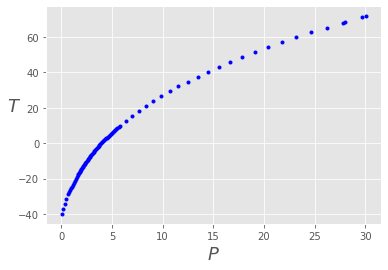

In [35]:
plt.plot(P,t,'b.')
plt.xlabel("$P$", fontsize=18)
plt.ylabel("$T$", rotation=0, fontsize=18)

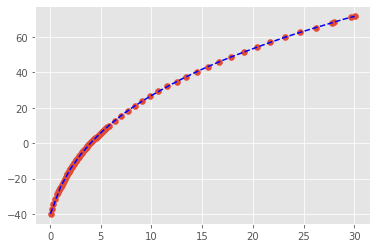

Coefficients: 19.24465440082208,-4.60569216328839,0.9954076521054982,-0.1480849125189888,0.014572201757367925,-0.0009416934581605159,3.9396669000116935e-05,-1.0250672261012095e-06,1.5056036066048632e-08,-9.528309266841696e-11,-40.560537812759286


In [36]:
# fiting a tenth degree polynomial to the data
 
# define the objective function
def objective(P,a,b,c,d,e,f,g,h,i,j,k):

	return (a * P) + (b * P**2) + (c * P**3) + (d * P**4) + (e * P**5) + (f * P**6) + (g * P**7) + (h * P**8) + (i * P**9) + (j * P**10) + k

# scipy curve fit
popt, _ = curve_fit(objective, P, t)
# summarize the parameter values
a, b, c, d,e,f,g,h,i,j,k= popt

# plot input vs output
plt.scatter(P, t)

# define a sequence of inputs between the smallest and largest known inputs
P_line = arange(min(P), max(P), 1)

# calculate the output for the range
t_line = objective(P_line, a, b, c,d,e,f,g,h,i,j,k)

# create a line plot for the mapping function
plt.plot(P_line, t_line, '--', color='blue')
plt.show()
print (F"Coefficients: {a},{b},{c},{d},{e},{f},{g},{h},{i},{j},{k}")


# Using Scikit-learn Polynomial Features to find a optimal model

In [66]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [76]:
X = df.iloc[:,0:1].values
y = df.iloc[:,-1].values

In [77]:
mse = []
i = 0
j = 0
while i < 15:

    poly = PolynomialFeatures(degree = i+1)
    X_poly = poly.fit_transform(X)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)
    y_pred = lin_reg.predict(X_poly)
    
    for j in range(len(t)):
        aux = (t[j] - y_pred[j])**2
        j = j + 1
    
    aux2 = (1/len(t))*(aux)
    mse.append(aux2)
    i = i + 1

ocn = mse.index(min(mse))
i = 0

In [78]:
for i in range (15):
    print(mse[i])

2.5923992251862367
0.49703999343604305
0.10948236543628422
0.02405722230614944
0.0067175010759027804
0.0016031135274307217
0.000420893732429306
0.00015174439873082873
2.7609597794310346e-05
0.06847086827281033
0.012986331945993388
0.22861147622906722
0.18689980625331096
0.09713889595988878
0.10760751720512247


In [86]:
poly = PolynomialFeatures(degree = ocn)
X_poly = poly.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
y_pred = lin_reg.predict(X_poly)

In [87]:
df2 = pd.DataFrame({'Real Values':t, 'Predicted Values':y_pred})
print(df2)

    Real Values  Predicted Values
0        -39.98        -39.455188
1        -37.45        -37.226371
2        -34.61        -34.625437
3        -31.72        -31.873950
4        -28.94        -29.155699
..          ...               ...
84        65.34         65.165420
85        68.12         68.173189
86        68.44         68.530564
87        71.13         71.239750
88        71.77         71.653788

[89 rows x 2 columns]


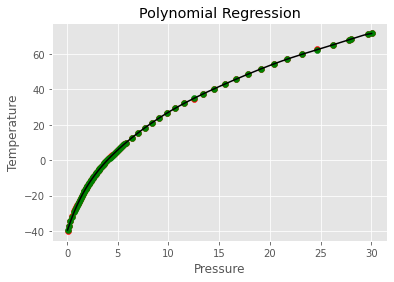

In [44]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.scatter(X, y_pred, color = 'green')
plt.plot(X_grid, lin_reg.predict(poly.fit_transform(X_grid)), color = 'black')
plt.title('Polynomial Regression')
plt.xlabel('Pressure')
plt.ylabel('Temperature')
plt.show()

## Now we can extract the independet term and the coeficients

In [91]:
for i in range (ocn + 1):
    print(F"{lin_reg.fit(X_poly, y).coef_[i]}^({poly.powers_[i]})")
    i = i + 1
print (lin_reg.fit(X_poly, y).intercept_)

0.0^([0])
17.8247616203855^([1])
-3.3257593569284616^([2])
0.5013056694343051^([3])
-0.048091588613207815^([4])
0.0028198074062991472^([5])
-9.753113488981271e-05^([6])
1.8226255930455048e-06^([7])
-1.4163710516670314e-08^([8])
-40.1628894387016
